## **Multi-Threading in Python**

Thread and Process, Starting a thread, Threading module, Synchronizing threads, Multithreaded Priority Queue

# **Multi-Threading**

**Multithreading** is the ability of a CPU to manage the use of operating system by executing multiple threads concurrently. 
- The main idea of multithreading is to **achieve parallelism by dividing a process into multiple threads / the way of achieving multitasking by using the concept of threads**.


In the figure below : 
- **more than one thread can exist within one process**
- Here **every thread contains its own register set and local variables**.
- **all the threads in a process share global variables.**

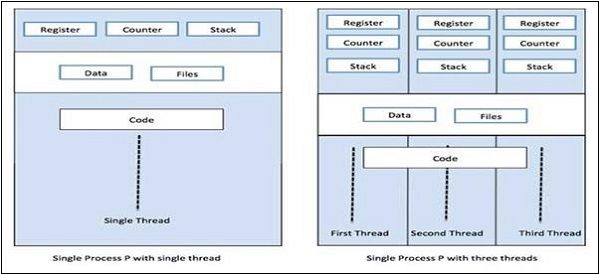

**Pros of Multithreading**
- **Speed of communication** − Multithreading improves the speed of computation because each core or processor handles separate threads concurrently.
- **Program remains responsive** − It allows a program to remain responsive because one thread waits for the input and another runs a GUI at the same time.
- **Access to global variables** − In multithreading, all the threads of a particular process can access the global variables and if there is any change in global variable then it is visible to other threads too.
- **Utilization of resources** − Running of several threads in each program makes better use of CPU and the idle time of CPU becomes less.
- **Sharing of data** − There is no requirement of extra space for each thread because threads within a program can share same data.

**Cons of Multithreading**
- **Not suitable for single processor system** − Multithreading finds it difficult to achieve performance in terms of speed of computation on single processor system as compared with the performance on multi-processor system.
- **Issue of security** − As we know that all the threads within a program share same data, hence there is always an issue of security because any unknown thread can change the data.
- **Increase in complexity** − Multithreading can increase the complexity of the program and debugging becomes difficult.
- **Lead to deadlock state** − Multithreading can lead the program to potential risk of attaining the deadlock state.
- **Synchronization required** − Synchronization is required to avoid mutual exclusion. This leads to more memory and CPU utilization.

# **Thread & Process**

In multithreading, process and thread are two very closely related terms having the **same goal to make computer able to do more than one thing at a time**. 
- A **process can contain one or more threads** but on the contrary, **thread cannot contain a process**. 
- However, they both remain the **two basic units of execution**. 
- **A program**, executing a series of instructions, **initiates process and thread both.**

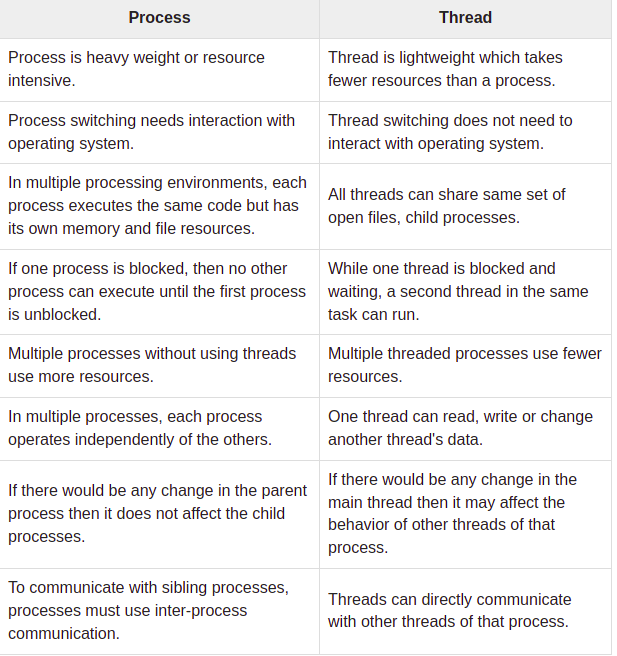

# **Thread**

**Thread**
- **smallest unit of execution in an operating system**. 
- It is not in itself a program but runs within a program. 
- helps us to **allow the program to execute sequential actions or many actions concurrently**.

**Characteristics of Threads:**
- Threads **share the same data space** with the main thread
- Threads helps to **share information or communicate with each other** more easily than if they were separate processes.
- Threads are called **light-weight processes** and they do not require much memory overhead
- Threads are **cheaper than processes.**
- A thread has a **beginning, an execution sequence, and a conclusion**. 
- It **has an instruction pointer** that keeps track of where within its context it is currently running.
- It can be **pre-empted (interrupted)**
- It can **temporarily be put on hold** (also known as sleeping) while other threads are running - this is called **yielding**.

**States of Thread / Life Cycle of a Thread**


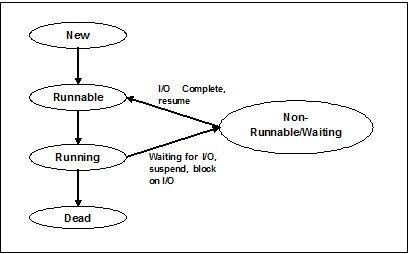

 A thread can exist in **five distinct states**.

**1. New Thread**
 - A new thread begins its life cycle in the new state. 
 - However, at this stage, it has not yet started and it has not been allocated any resources. 
 - Just an instance of an object is created.

**2. Runnable**
- As the newly born thread is started, the thread becomes runnable i.e. waiting to run. 
- In this state, it has all the resources but still task scheduler have not scheduled it to run.

**3. Running**
- In this state, the thread makes progress and executes the task, which has been chosen by task scheduler to run. 
- Now, the thread can go to either the dead state or the non-runnable/ waiting state.

**4. Non-running/waiting**
- In this state, the thread is paused because it is either waiting for the response of some I/O request or waiting for the completion of the execution of other thread.

**5. Dead**
- A runnable thread enters the terminated state when it completes its task or otherwise terminates.

# **Starting a Thread**

- Two main modules of multithreading used to handle threads in Python.
1. **_thread** module     // Used for low-level threading
2. **threading** module  // Used for high level threading

1. Using **thread** module
- Syntax: **thread.start_new_thread ( function, args[, kwargs] )**

- The method call **enables a fast and efficient way to create new threads** in both Linux and Windows.
- The **method call returns immediately and the child thread starts and calls function with the passed list of args**. 
- When **function returns, the thread terminates**.
- Here,
-- **args** is a tuple of arguments; use an empty tuple to call function without passing any arguments.
-- **kwargs** is an optional dictionary of keyword arguments.

**Example - 1**

In [ ]:
import _thread
import time

# Define a function for the thread
def print_time( threadName, delay):
   count = 0
   while count < 5:
      time.sleep(delay)
      count += 1
      print ("%s: %s" % ( threadName, time.ctime(time.time()) ))

# Create two threads as follows
try:
   _thread.start_new_thread( print_time, ("Thread-1", 2, ) )
   _thread.start_new_thread( print_time, ("Thread-2", 4, ) )
except:
    print("Error: unable to start thread")

time.sleep(22)
print("Done.")

Thread-1: Fri Sep 19 14:43:01 2025
Thread-2: Fri Sep 19 14:43:03 2025
Thread-1: Fri Sep 19 14:43:03 2025
Thread-1: Fri Sep 19 14:43:05 2025
Thread-1: Fri Sep 19 14:43:07 2025Thread-2: Fri Sep 19 14:43:07 2025

Thread-1: Fri Sep 19 14:43:09 2025
Thread-2: Fri Sep 19 14:43:11 2025
Thread-2: Fri Sep 19 14:43:15 2025
Thread-2: Fri Sep 19 14:43:19 2025
Done.


**Example - 2**

In [ ]:
import time
import _thread

# Shared counter and lock
completed_threads = 0
lock = _thread.allocate_lock()

def thread_test(name, wait):
    global completed_threads
    for i in range(4):
        time.sleep(wait)
        print("Running %s\n" % name)
    
    print("%s has finished execution" % name)

    # Update completed thread count safely
    lock.acquire()
    completed_threads += 1
    lock.release()

if __name__ == "__main__":
    try:
        _thread.start_new_thread(thread_test, ("First Thread", 1))
        _thread.start_new_thread(thread_test, ("Second Thread", 2))
        _thread.start_new_thread(thread_test, ("Third Thread", 3))
    except:
        print("Error: unable to start thread")

    # Wait until all threads finish
    while True:
        lock.acquire()
        if completed_threads == 3:
            lock.release()
            break
        lock.release()
        time.sleep(0.5)  # Avoid busy waiting

    print("All threads completed. Exiting program.")


Notice how the main program continues its execution *immediately* after `my_thread.start()` is called. The `join()` method is crucial for ensuring that the main program doesn't exit before its threads are done.

# 2. Using **threading** module

Python's `threading` module provides a simple way to create and manage threads. Let's create a thread that performs a simple task: printing a message and then sleeping for a second.

| **Old Method (Deprecated)** | **New / Recommended Usage for >3.12** | **Notes**                               |
| --------------------------- | --------------------------- | --------------------------------------- |
| `isAlive()`                 | `is_alive()`                | Checks if a thread is still running.    |
| `getName()`                 | `t.name`                    | Access thread name as an attribute.     |
| `setName("NewName")`        | `t.name = "NewName"`        | Assign new name directly via attribute. |

**Still valide (no change)** 

| **Method** | **Purpose**                                   |
| ---------- | --------------------------------------------- |
| `run()`    | Defines thread’s activity (entry point).      |
| `start()`  | Starts the thread (calls `run()` internally). |
| `join()`   | Waits for the thread to terminate.            |

**Additinoal Methods**

| **Old Function (Deprecated)** | **New / Recommended Usage**  | **Notes**                                    |
| ----------------------------- | ---------------------------- | -------------------------------------------- |
| `threading.activeCount()`     | `threading.active_count()`   | Returns number of active threads.            |
| `threading.currentThread()`   | `threading.current_thread()` | Returns the current `Thread` object.         |
| `threading.enumerate()`       | Still valid                | Returns list of all active `Thread` objects. |


**Key components:**
- `threading.Thread(target=..., args=...)`: Creates a new thread object.
  - `target`: The function that the thread will execute.
  - `args`: A tuple of arguments to pass to the target function.
- `thread.start()`: Starts the execution of the thread.
- `thread.join()`: Makes the main program wait until this thread has finished its execution.

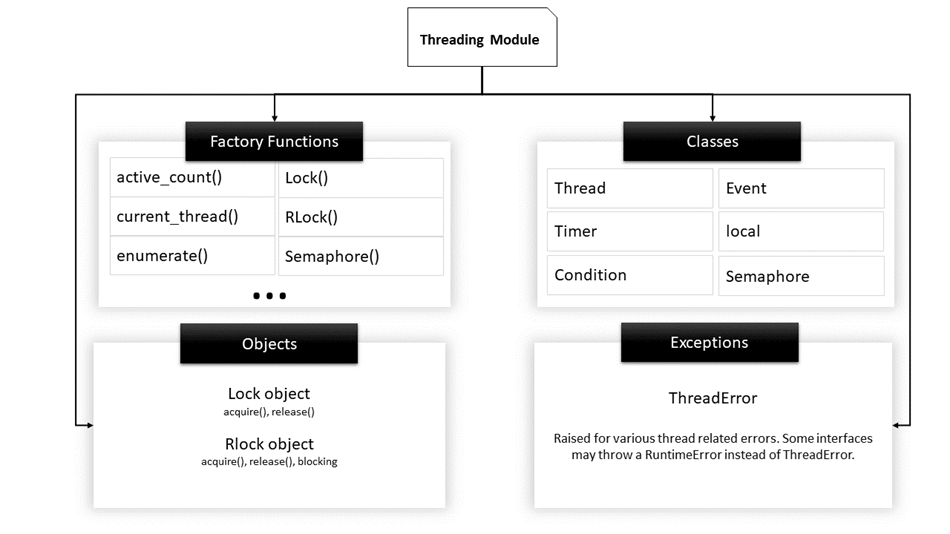

**Example - 0**

In [2]:
import threading  
def print_hello(n):  
    print("Hello, how old are you? ", n)  
T1 = threading.Thread( target = print_hello, args = (30, ))  
T1.start()  
T1.join()  
print("Hamm, Thank you")  

Hello, how old are you?  30
Hamm, Thank you


In [3]:
import threading
import time


# Worker function for threads
def worker(delay):
    """Simulate work by sleeping for 'delay' seconds"""
    current = threading.current_thread()   # modern: current_thread()
    print(f"[{current.name}] starting, daemon={current.daemon}")
    time.sleep(delay)
    print(f"[{current.name}] finished")


def main():
    # Create threads
    t1 = threading.Thread(target=worker, args=(2,), name="Worker-1")
    t2 = threading.Thread(target=worker, args=(3,), name="Worker-2")

    # Start threads
    t1.start()
    t2.start()

    # Demonstrate new methods
    print("\n--- Demonstrating Thread Methods ---")
    print(f"t1 is alive? {t1.is_alive()}")   # modern replacement for isAlive()
    print(f"t2 initial name: {t2.name}")     # modern replacement for getName()

    # Change thread name
    t2.name = "Renamed-Worker"
    print(f"t2 renamed to: {t2.name}")       # modern replacement for setName()

    # Module-level methods
    print("\n--- Demonstrating Module-level Methods ---")
    print(f"Active threads count: {threading.active_count()}")   # instead of activeCount()
    print(f"Current thread: {threading.current_thread().name}")  # instead of currentThread()
    print("All active threads:", [t.name for t in threading.enumerate()])  # enumerate()

    # Wait for threads to finish
    t1.join()
    t2.join()

    print("\n--- After join() ---")
    print(f"t1 is alive? {t1.is_alive()}")
    print(f"t2 is alive? {t2.is_alive()}")
    print(f"Final active threads: {threading.active_count()}")


if __name__ == "__main__":
    main()


[Worker-1] starting, daemon=False
[Worker-2] starting, daemon=False

--- Demonstrating Thread Methods ---
t1 is alive? True
t2 initial name: Worker-2
t2 renamed to: Renamed-Worker

--- Demonstrating Module-level Methods ---
Active threads count: 8
Current thread: MainThread
All active threads: ['MainThread', 'IOPub', 'Heartbeat', 'Control', 'IPythonHistorySavingThread', 'Thread-1', 'Worker-1', 'Renamed-Worker']
[Worker-1] finished
[Renamed-Worker] finished

--- After join() ---
t1 is alive? False
t2 is alive? False
Final active threads: 6


**Steps for creating a Thread using threading module**
1. Define a new subclass of the Thread class.
2. Override the __init__(self [,args]) method to add additional arguments.
3. Override the run(self [,args]) method to implement what the thread should do when started.
4. Create an instance of new subclass
5. Start a new thread by invoking the start(), which in turn calls run() method.

**Example**

In [ ]:
import threading
import time

# Define a thread class
class JobThread(threading.Thread):
    def __init__(self, job_name, wait_time):
        super().__init__(name=job_name)  # directly set name via constructor
        self.wait_time = wait_time

    def run(self):
        print(f"[{self.name}] Started | Current Thread: {threading.current_thread().name}")
        for i in range(3):
            time.sleep(self.wait_time)
            print(f"[{self.name}] Working... ({i+1}/3)")
        print(f"[{self.name}] Finished execution")


start_time = time.time()

# Create multiple threads
job1 = JobThread("Job-A", 1)
job2 = JobThread("Job-B", 2)
job3 = JobThread("Job-C", 3)

# Start all threads
job1.start()
job2.start()
job3.start()

# Display currently active threads
print("\nActive Threads After Start:", threading.active_count())
print("Currently Running Threads:", [t.name for t in threading.enumerate()])

# Check alive status
print(f"\n[job1 is_alive()?] {job1.is_alive()}")
print(f"[job2 is_alive()?] {job2.is_alive()}")
print(f"[job3 is_alive()?] {job3.is_alive()}")

# Wait for all threads to finish
job1.join()
job2.join()
job3.join()

end_time = time.time()

# Final status
print("\nAll jobs completed.")
print("Final Active Threads Count:", threading.active_count())
print(f"Total execution time: {end_time - start_time:.2f} seconds")


### Filtered Threading Program with Execution Time

In [ ]:
import threading
import time

class TaskThread(threading.Thread):
    def __init__(self, name, wait_time):
        super().__init__(name=name)  # set name directly via constructor
        self.wait_time = wait_time

    def run(self):
        print(f"{self.name} started")
        for i in range(3):
            time.sleep(self.wait_time)
            print(f"{self.name} running... ({i+1}/3)")
        print(f"{self.name} finished")


# Record start time
start_time = time.time()
print(f"Start time = {start_time}")

# Create and start threads
t1 = TaskThread("Job-A", 1)
t2 = TaskThread("Job-B", 2)
t3 = TaskThread("Job-C", 3)

t1.start()
t2.start()
t3.start()

# Allow threads to start before checking
time.sleep(0.1)

# Filter and display only user-created threads
system_threads = {
    "MainThread", "IOPub", "Control", "Heartbeat",
    "IPythonHistorySavingThread", "Thread-2", "Thread-3", "Thread-1"
}

user_threads = [t.name for t in threading.enumerate() if t.name not in system_threads]
print("\nCurrently Running User Threads:", user_threads)

# Wait for all threads to finish
t1.join()
t2.join()
t3.join()

# Record end time
end_time = time.time()
print(f"End time = {end_time}")

print("\nAll threads completed.")
print(f"Total execution time: {end_time - start_time:.2f} seconds")


**Example**

In [ ]:
import threading
import time

exitFlag = 0

class myThread(threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter

    def run(self):
        print("Starting " + self.name)
        print_time(self.name, self.counter, 5)
        print("Exiting " + self.name)

def print_time(threadName, counter, delay):
    while counter:
        if exitFlag:
            return
        time.sleep(delay)
        print("%s: %s" % (threadName, time.ctime(time.time())))
        counter -= 1

# Create new threads
thread1 = myThread(1, "Thread-1", 1)
thread2 = myThread(2, "Thread-2", 2)

# Start new Threads
thread1.start()
thread2.start()

# Wait for threads to complete
thread1.join()
thread2.join()

print("Exiting Main Thread")


In [ ]:
import threading
import time

exitFlag = 0

class MyThread(threading.Thread):
    def __init__(self, threadID, name, counter):
        super().__init__(name=name)  # set thread name here
        self.threadID = threadID
        self.counter = counter

    def run(self):
        print(f"Starting {self.name}")
        print_time(self.name, self.counter, 5)
        print(f"Exiting {self.name}")


def print_time(threadName, counter, delay):
    while counter:
        if exitFlag:
            return
        time.sleep(delay)
        print(f"{threadName}: {time.ctime(time.time())}")
        counter -= 1


# Create new threads
thread1 = MyThread(1, "Thread-1", 1)
thread2 = MyThread(2, "Thread-2", 2)

# Start new threads
thread1.start()
thread2.start()

# Wait for threads to complete
thread1.join()
thread2.join()

print("Exiting Main Thread")

**Example**

In [ ]:
import time # import time module  
import threading  
from threading import *  
def cal_sqre(num): # define a square calculating function  
    print(" Calculate the square root of the given number")  
    for n in num: # Use for loop   
        time.sleep(0.3) # at each iteration it waits for 0.3 time  
        print(' Square is : ', n * n)  
  
def cal_cube(num): # define a cube calculating function  
    print(" Calculate the cube of  the given number")  
    for n in num: # for loop  
        time.sleep(0.3) # at each iteration it waits for 0.3 time  
        print(" Cube is : ", n * n *n)  
  
ar = [4, 5, 6, 7, 2] # given array  
  
t = time.time() # get total time to execute the functions  
#cal_cube(ar)  
#cal_sqre(ar)  
th1 = threading.Thread(target=cal_sqre, args=(ar, ))  
th2 = threading.Thread(target=cal_cube, args=(ar, ))  
th1.start()  
th2.start()  
th1.join()  
th2.join()  
print(" Total time taking by threads is :", time.time() - t) # print the total time  
print(" Again executing the main thread")  
print(" Thread 1 and Thread 2 have finished their execution.")  

In [ ]:
import time
import threading


def cal_square(numbers):
    """Calculate and print squares of given numbers."""
    print("Calculating the square of the given numbers")
    for n in numbers:
        time.sleep(0.3)
        print(f"Square of {n} is: {n * n}")


def cal_cube(numbers):
    """Calculate and print cubes of given numbers."""
    print("Calculating the cube of the given numbers")
    for n in numbers:
        time.sleep(0.3)
        print(f"Cube of {n} is: {n * n * n}")


# Given array
arr = [4, 5, 6, 7, 2]

# Record start time
start_time = time.time()

# Create threads
t1 = threading.Thread(target=cal_square, args=(arr,), name="SquareThread")
t2 = threading.Thread(target=cal_cube, args=(arr,), name="CubeThread")

# Start threads
t1.start()
t2.start()

# Wait for threads to complete
t1.join()
t2.join()

# Record end time
end_time = time.time()

print(f"\nTotal time taken by threads: {end_time - start_time:.2f} seconds")
print("Main thread finished — SquareThread and CubeThread have completed their execution.")


## Synchronization and the GIL

**Example: Without MultiThreading**

In [4]:
import requests
def download_img(img_url: str):
	"""
	Download image from img_url in curent directory
	"""
	res = requests.get(img_url, stream=True)
	filename = f"{img_url.split('/')[-1]}.jpg"

	with open(filename, 'wb') as f:
		for block in res.iter_content(1024):
			f.write(block)

if __name__ == '__main__':
    images = [
    	# Photo credits: https://unsplash.com/photos/IKUYGCFmfw4 
    	'https://images.unsplash.com/photo-1509718443690-d8e2fb3474b7',

    	# Photo credits: https://unsplash.com/photos/vpOeXr5wmR4
    	'https://images.unsplash.com/photo-1587620962725-abab7fe55159',

    	# Photo credits: https://unsplash.com/photos/iacpoKgpBAM
    	'https://images.unsplash.com/photo-1493119508027-2b584f234d6c',

    	# Photo credits: https://unsplash.com/photos/b18TRXc8UPQ
    	'https://images.unsplash.com/photo-1482062364825-616fd23b8fc1',

    	# Photo credits: https://unsplash.com/photos/XMFZqrGyV-Q
    	'https://images.unsplash.com/photo-1521185496955-15097b20c5fe',

    	# Photo credits: https://unsplash.com/photos/9SoCnyQmkzI
    	'https://images.unsplash.com/photo-1510915228340-29c85a43dcfe',
    ]
    for img in images * 5:
        download_img(img)

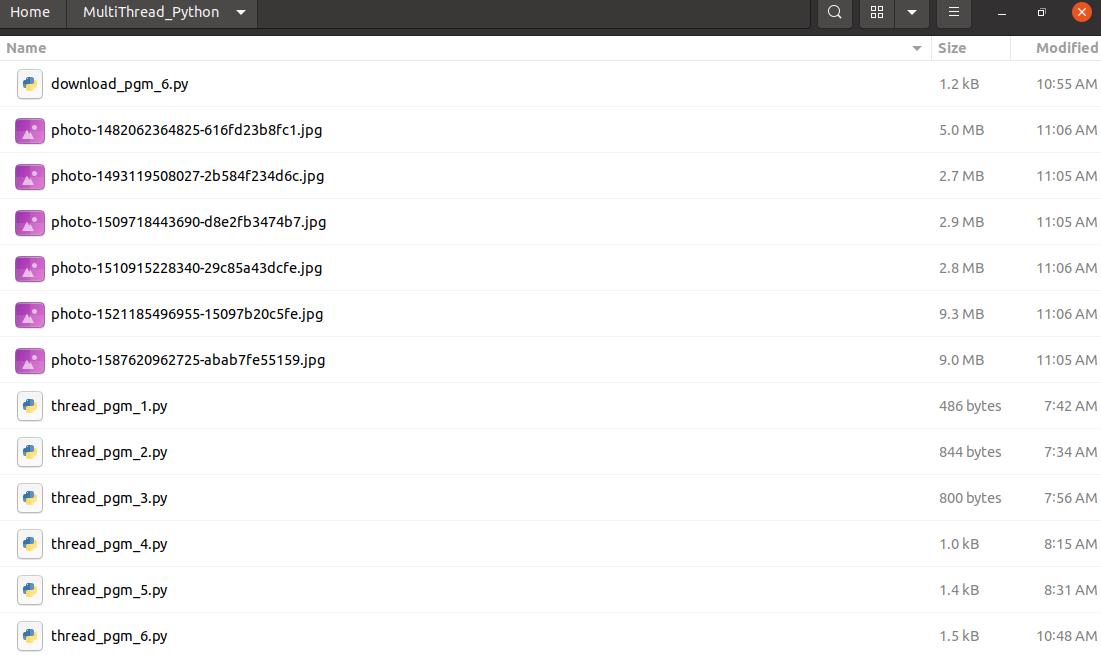

### A Note on the Global Interpreter Lock (GIL)

In the standard CPython interpreter, there's something called the **Global Interpreter Lock (GIL)**. It's a lock that allows only **one thread to execute Python bytecode at a time**, even on a multi-core processor. 

This means Python's `threading` module does not achieve true parallelism for **CPU-bound** tasks (like heavy calculations). However, the GIL is released during **I/O-bound** operations (like reading a file, making a network request, or waiting with `time.sleep()`). 

**Key Takeaway:** Multithreading in Python is perfect for tasks that spend a lot of time waiting for external resources (I/O-bound), as it allows other threads to run during these waiting periods. For CPU-bound tasks, `multiprocessing` is the better choice.

## Thread-Safe Queues

A more robust way to handle communication and share work between threads is to use a thread-safe data structure. Python's `queue` module provides exactly this.

A `queue.Queue` is thread-safe, meaning you don't need to use locks to protect it. It's perfect for the **Producer-Consumer** pattern, where one or more "producer" threads add tasks to a queue, and one or more "consumer" threads pull tasks from the queue to process them.

**Example - 4 : With MultiThreading**

In [5]:
import requests
from queue import Queue
from threading import Thread

NUM_THREADS = 5
q = Queue()

def download_img():
	"""
	Download image from img_url in curent directory
	"""
	global q

	while True:
		img_url = q.get()

		res = requests.get(img_url, stream=True)
		filename = f"{img_url.split('/')[-1]}.jpg"

		with open(filename, 'wb') as f:
			for block in res.iter_content(1024):
				f.write(block)
		q.task_done()

if __name__ == '__main__':
    images = [
    	# Photo credits: https://unsplash.com/photos/IKUYGCFmfw4 
    	'https://images.unsplash.com/photo-1509718443690-d8e2fb3474b7',

    	# Photo credits: https://unsplash.com/photos/vpOeXr5wmR4
    	'https://images.unsplash.com/photo-1587620962725-abab7fe55159',

    	# Photo credits: https://unsplash.com/photos/iacpoKgpBAM
    	'https://images.unsplash.com/photo-1493119508027-2b584f234d6c',

    	# Photo credits: https://unsplash.com/photos/b18TRXc8UPQ
    	'https://images.unsplash.com/photo-1482062364825-616fd23b8fc1',

    	# Photo credits: https://unsplash.com/photos/XMFZqrGyV-Q
    	'https://images.unsplash.com/photo-1521185496955-15097b20c5fe',

    	# Photo credits: https://unsplash.com/photos/9SoCnyQmkzI
    	'https://images.unsplash.com/photo-1510915228340-29c85a43dcfe',
    ]
    
    for img_url in images * 5:
        q.put(img_url)

    for t in range(NUM_THREADS):

        worker = Thread(target=download_img)
        worker.daemon = True
        worker.start()

    q.join()

**Example - 5**

# Synchronizing Threads and The Problem: Race Conditions

Because threads share the same memory, problems can arise when multiple threads try to read from and write to the same variable at the same time. This is called a **race condition**. The final value of the variable depends on the unpredictable order in which threads are scheduled by the operating system.**

- The threading module provided with Python includes a simple-to-implement **locking mechanism that allows you to synchronize threads**. 
1. **Lock()** method, which returns the new lock.
2. **acquire(blocking)** method of the new lock object is used to **force threads to run synchronously**. 

- - The optional **blocking** parameter enables you to control whether the thread waits to acquire the lock.
- - If blocking is set to 0, the thread returns immediately with a 0 value if the lock cannot be acquired and with a 1 if the lock was acquired. 
- - If blocking is set to 1, the thread blocks and wait for the lock to be released.
3. **release()** method of the new lock object is used to **release the lock when it is no longer required**.

In [ ]:
#!/usr/bin/python

import threading
import time

class myThread (threading.Thread):
   def __init__(self, threadID, name, counter):
      threading.Thread.__init__(self)
      self.threadID = threadID
      self.name = name
      self.counter = counter
   def run(self):
      print ("Starting " + self.name)
      # Get lock to synchronize threads
      threadLock.acquire()
      print_time(self.name, self.counter, 3)
      # Free lock to release next thread
      threadLock.release()

def print_time(threadName, delay, counter):
   while counter:
      time.sleep(delay)
      print ("%s: %s" % (threadName, time.ctime(time.time())))
      counter -= 1

threadLock = threading.Lock()
threads = []

# Create new threads
thread1 = myThread(1, "Thread-1", 1)
thread2 = myThread(2, "Thread-2", 2)

# Start new Threads
thread1.start()
thread2.start()

# Add threads to thread list
threads.append(thread1)
threads.append(thread2)

# Wait for all threads to complete
for t in threads:
    t.join()
print ("Exiting Main Thread")

### With time tracking 


In [ ]:
import threading
import time

exitFlag = 0

class MyThread(threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter

    def run(self):
        print(f"[{self.name}] Starting")
        print_time(self.name, self.counter, 5)
        print(f"[{self.name}] Exiting")

def print_time(threadName, counter, delay):
    while counter:
        if exitFlag:
            return
        time.sleep(delay)
        print(f"{threadName}: {time.ctime(time.time())}")
        counter -= 1

# Start timing
start_time = time.time()

# Create threads
thread1 = MyThread(1, "Thread-1", 1)
thread2 = MyThread(2, "Thread-2", 2)

# Start threads
thread1.start()
thread2.start()

# Status check after start
time.sleep(0.1)
print(f"\n[Status Check]")
print(f"{thread1.name} is alive? {thread1.is_alive()}")
print(f"{thread2.name} is alive? {thread2.is_alive()}")

# Wait for completion
thread1.join()
thread2.join()

#  End timing
end_time = time.time()

# Final status and summary
print(f"\n[Final Status]")
print(f"{thread1.name} is alive? {thread1.is_alive()}")
print(f"{thread2.name} is alive? {thread2.is_alive()}")
print(f"\nTotal Execution Time: {end_time - start_time:.2f} seconds")
print("Exiting Main Thread")


# **Multithreaded Priority Queue**

1. What is a Priority Queue?

A priority queue is like a normal queue, except each item has a priority (usually a number).

Items with higher priority (smaller number = higher priority by default) are retrieved first.

In Python, we typically use queue.PriorityQueue, which is thread-safe (handles locks internally).
The **Queue** module allows you to create a new queue object that can hold a specific number of items. 

2. Why Use Priority Queue in Multithreading?

When multiple threads are producing and consuming tasks, you may want to control which tasks get executed first.

**Benefits:**

Task prioritization: Critical/urgent tasks execute before less important ones.
(e.g., in a server, user login requests should process before background analytics).

Thread safety: No need to manually handle locks; PriorityQueue already does this.

Fair scheduling: Prevents starvation if designed well (by mixing priorities with timestamps).

3. When to Use?

You should use multithreading with a priority queue when:

You have multiple tasks with different urgency levels.
Example: An operating system scheduler, print jobs, or real-time processing.

You want producer threads to enqueue jobs and consumer threads to process them in order of importance.

You want to avoid race conditions while sharing a task queue between threads.
4. How It Works (Internally)

PriorityQueue stores items as (priority, task) tuples.

Lower priority values are retrieved first.

Multiple threads can safely .put() (producer) and .get() (consumer).

**Methods to control the Queue:**
- **get()** removes and returns an item from the queue.
- **put()** adds item to a queue.
- **qsize()** returns the number of items that are currently in the queue.
- **empty()** returns True if queue is empty; otherwise, False.
- **full()** returns True if queue is full; otherwise, False

In [ ]:
import threading
import queue
import time
import random

# Create a Priority Queue (thread-safe)
task_queue = queue.PriorityQueue()

def producer():
    """Producer thread that adds tasks with random priorities"""
    for i in range(5):
        priority = random.randint(1, 5)   # 1 = highest priority
        task = f"Task-{i}"
        print(f"[Producer] Adding {task} with priority {priority}")
        task_queue.put((priority, task))
        time.sleep(1)  # simulate time between task creation

def consumer():
    """Consumer thread that processes tasks based on priority"""
    while True:
        priority, task = task_queue.get()  # blocks until item is available
        print(f"[Consumer] Processing {task} with priority {priority}")
        time.sleep(2)  # simulate task processing
        task_queue.task_done()

# Start producer thread
producer_thread = threading.Thread(target=producer)
producer_thread.start()

# Start 2 consumer threads
for _ in range(2):
    t = threading.Thread(target=consumer, daemon=True)
    t.start()

# Wait for producer to finish
producer_thread.join()

# Wait for all tasks to be processed
task_queue.join()
print("All tasks processed!")


In [ ]:
# To upload images into Colab Notebook
#from google.colab import files
#from IPython.display import Image
#uploaded = files.upload()